In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'/Users/wyssuser/Python/NFL2/EDA'

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('../DATA/master/NFL.csv', index_col=0)
print(len(df))
df.index = pd.to_datetime(df.index)
df.index.dtype

5358


dtype('<M8[ns]')

In [5]:
df.head()

,drive,sp,goal_to_go,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,...,opponent,third_down_perc,fourth_down_perc,pass_perc,spread,yards_per_deep_pass,yards_per_rush,yards_per_short_pass,yards_per_play,home
game_date,,,,,,,,,,,,,,,,,,,,,
2009-09-10,25,4,0.0,357.0,38,14,48.0,0,0,1,...,TEN,0.285714,0.0,0.804878,3,14.500000,1.565217,6.606061,5.100000,1
2009-09-10,24,3,0.0,320.0,18,0,36.0,0,0,0,...,PIT,0.307692,0.0,0.647059,0,13.142857,3.440000,5.428571,5.245902,0
2009-09-13,22,5,4.0,281.0,17,0,38.0,3,0,0,...,MIA,0.400000,0.0,0.611111,12,3.666667,2.518519,6.900000,4.323077,1
2009-09-13,21,2,1.0,259.0,21,0,33.0,0,0,0,...,ATL,0.363636,1.0,0.724138,12,9.250000,4.363636,5.346154,4.625000,0
2009-09-13,21,12,8.0,501.0,20,43,49.0,0,0,7,...,KC,0.588235,1.0,0.619048,15,11.200000,4.829268,5.909091,5.894118,1


In [7]:
boo = df.index>pd.to_datetime('06/01/2014')
df = df[boo]
print(len(df))

2680


In [8]:
df.head()

,drive,sp,goal_to_go,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,...,opponent,third_down_perc,fourth_down_perc,pass_perc,spread,yards_per_deep_pass,yards_per_rush,yards_per_short_pass,yards_per_play,home
game_date,,,,,,,,,,,,,,,,,,,,,
2014-09-04,19,5,8.0,255.0,45,4,37.0,0,0,0,...,SEA,0.500000,0.0,0.718750,20,3.833333,3.809524,6.148148,4.396552,0
2014-09-04,20,10,6.0,398.0,45,2,32.0,3,0,3,...,GB,0.363636,1.0,0.678571,20,8.142857,5.594595,6.380952,6.030303,1
2014-09-07,21,11,3.0,568.0,47,3,46.0,0,1,3,...,NO,0.545455,0.0,0.720930,3,20.500000,4.920000,7.593750,8.231884,1
2014-09-07,20,10,6.0,472.0,44,0,43.0,0,0,1,...,ATL,0.615385,0.0,0.707317,0,17.800000,4.964286,6.594595,6.742857,0
2014-09-07,23,4,0.0,420.0,54,16,67.0,0,0,3,...,CIN,0.470588,0.5,0.573770,-7,14.714286,4.333333,4.400000,4.883721,1


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn

In [64]:
# #df = df.drop(['touchback', 'assist_tackle_3_team', 'assist_tackle_4_team'], axis=1)

# df['third_down_perc'] = df.third_down_converted / sum(df.third_down_converted, df.third_down_failed)
# df['fourth_down_perc'] = df.fourth_down_converted / sum(df.fourth_down_converted, df.fourth_down_failed)
# df['pass_perc'] = df.complete_pass / sum(df.complete_pass, df.incomplete_pass)
# df['spread'] = df.total_home_score - df.total_away_score
# df['yards_per_deep_pass'] = df.deep_pass_yards / df.deep_pass_attempt
# df['yards_per_rush'] = df.rush_yards / df.rush_attempt
# df['yards_per_short_pass'] = df.short_pass_yards / df.short_pass_attempt
# df['yards_per_play'] = df.yards_gained / df.total_plays

# def home(row):
#     if row['team'] == row['home_team']:
#         return 1
#     else:
#         return 0
    
# df['home'] = df[['team', 'home_team']].apply(home, axis=1)

In [65]:
# score_vars = ['sp', 'total_home_score', 'total_away_score', 'touchdown', 'pass_touchdown', 'rush_touchdown',
#              'extra_point_attempt', 'two_point_attempt', 'field_goal_attempt', 'field_goal_result',
#              'extra_point_result', 'two_point_conv_result', 'safety', 'return_touchdown', 
#               'defensive_two_point_attempt', 'defensive_two_point_conv', 'defensive_extra_point_attempt', 
#               'defensive_extra_point_conv', 'win', 'spread']

In [66]:
# df = df.drop(score_vars, axis=1)
# print(len(df.columns))

80


In [67]:
# # 78 is far too many. We need to get it down to maybe 25 before we can start anything meaningful
# # these represent what may be noisy variables (i.e. not associated with outcome) and variables that 
# # have already been used to calculate another stat
# noise = ['shotgun', 'qb_dropback', 'third_down_converted', 'third_down_failed',
#          'fourth_down_converted', 'fourth_down_failed', 'punt_in_endzone',
#          'punt_out_of_bounds', 'punt_downed', 'kickoff_inside_twenty',
#          'kickoff_in_endzone', 'kickoff_out_of_bounds', 'kickoff_downed',
#          'fumble_forced', 'fumble_not_forced', 'fumble_out_of_bounds',
#          'solo_tackle', 'own_kickoff_recovery', 'own_kickoff_recovery_td',
#          'kickoff_attempt', 'assist_tackle', 'lateral_reception',
#          'lateral_rush', 'lateral_return', 'lateral_recovery',
#          'fumble_recovery_1_yards', 'fumble_recovery_2_yards','total_plays',
#          'complete_pass', 'incomplete_pass', 'deep_pass_yards',
#          'deep_pass_attempt', 'rush_yards', 'rush_attempt', 'yards_gained',
#          'short_pass_yards', 'short_pass_attempt', 'qb_kneel', 
#         'qb_spike', 'qb_scramble', 'punt_fair_catch', 'fumble_lost',
#         'deep_pass_complete', 'short_pass_complete', 'kickoff_fair_catch',
#         'no_huddle', 'penalty', 'pass_length', 'penalty_yards']
# df = df.drop(noise, axis=1)

In [10]:
for i in df.columns:
    print(i)
    
print(len(df.columns))

drive
sp
goal_to_go
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
air_yards
yards_after_catch
field_goal_result
extra_point_result
two_point_conv_result
total_home_score
total_away_score
punt_blocked
first_down_rush
first_down_pass
first_down_penalty
third_down_converted
third_down_failed
fourth_down_converted
fourth_down_failed
incomplete_pass
interception
punt_inside_twenty
punt_in_endzone
punt_out_of_bounds
punt_downed
punt_fair_catch
kickoff_inside_twenty
kickoff_in_endzone
kickoff_out_of_bounds
kickoff_downed
kickoff_fair_catch
fumble_forced
fumble_not_forced
fumble_out_of_bounds
solo_tackle
safety
penalty
tackled_for_loss
fumble_lost
own_kickoff_recovery
own_kickoff_recovery_td
qb_hit
rush_attempt
pass_attempt
sack
touchdown
pass_touchdown
rush_touchdown
return_touchdown
extra_point_attempt
two_point_attempt
field_goal_attempt
kickoff_attempt
punt_attempt
fumble
complete_pass
assist_tackle
lateral_reception
lateral_rush
lateral_return
latera

In [13]:
features = ['drive',
                        'goal_to_go',
                        'air_yards',
                        'yards_after_catch',
                        'punt_blocked',
                        'first_down_rush',
                        'first_down_pass',
                        'first_down_penalty',
                        'interception',
                        'punt_inside_twenty',
                        'tackled_for_loss',
                        'qb_hit',
                        'pass_attempt',
                        'sack',
                        'punt_attempt',
                        'fumble',
                        'return_yards',
                        'third_down_perc',
                        'fourth_down_perc',
                        'pass_perc',
                        'yards_per_deep_pass',
                        'yards_per_rush',
                        'yards_per_short_pass',
                        'yards_per_play',
                        'home']
data = df[features]

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(data, df.team_score,
                                               test_size=0.30)
lm = LinearRegression()
lm.fit(xtrain, ytrain)
predictions = lm.predict(xtest)
mean_squared_error(ytest, predictions)**0.5


4.979617522143182

In [15]:
predictions[0]

23.04719667940815

In [16]:
import shelve
s = shelve.open('../models/model1')
s['model1'] = lm
s.close()

In [17]:
sklearn.__version__

'0.21.2'

In [20]:
[i for i in data.columns]

['drive',
 'goal_to_go',
 'air_yards',
 'yards_after_catch',
 'punt_blocked',
 'first_down_rush',
 'first_down_pass',
 'first_down_penalty',
 'interception',
 'punt_inside_twenty',
 'tackled_for_loss',
 'qb_hit',
 'pass_attempt',
 'sack',
 'punt_attempt',
 'fumble',
 'return_yards',
 'third_down_perc',
 'fourth_down_perc',
 'pass_perc',
 'yards_per_deep_pass',
 'yards_per_rush',
 'yards_per_short_pass',
 'yards_per_play',
 'home']

In [22]:
for i in range(len(data.columns)):
    print(lm.coef_[i], '\t\t', data.colums[i])

AttributeError: 'DataFrame' object has no attribute 'colums'

In [560]:
[i for i in data.columns]

['drive',
 'goal_to_go',
 'air_yards',
 'yards_after_catch',
 'punt_blocked',
 'first_down_rush',
 'first_down_pass',
 'first_down_penalty',
 'interception',
 'punt_inside_twenty',
 'tackled_for_loss',
 'qb_hit',
 'pass_attempt',
 'sack',
 'punt_attempt',
 'fumble',
 'return_yards',
 'third_down_perc',
 'fourth_down_perc',
 'pass_perc',
 'yards_per_deep_pass',
 'yards_per_rush',
 'yards_per_short_pass',
 'yards_per_play',
 'home']

In [561]:
data['team_score'] = df.team_score

In [562]:
data.head()

,drive,goal_to_go,air_yards,yards_after_catch,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,interception,punt_inside_twenty,...,return_yards,third_down_perc,fourth_down_perc,pass_perc,yards_per_deep_pass,yards_per_rush,yards_per_short_pass,yards_per_play,home,team_score
game_date,,,,,,,,,,,,,,,,,,,,,
2019-01-05,18,0.0,352.0,139.0,0.0,7.0,13.0,0.0,1.0,2.0,...,56.0,0.000216,0.001536,0.000489,3.333333,6.562500,5.000000,4.735294,1,7
2019-01-05,19,3.0,328.0,48.0,0.0,10.0,14.0,2.0,1.0,2.0,...,0.0,0.000649,0.000000,0.000320,12.125000,5.714286,5.208333,6.298507,0,21
2019-01-05,24,3.0,245.0,103.0,0.0,9.0,11.0,3.0,1.0,1.0,...,37.0,0.000289,0.000000,0.000371,6.750000,4.823529,6.862069,5.588235,1,24
2019-01-05,23,2.0,224.0,98.0,0.0,5.0,6.0,0.0,0.0,1.0,...,132.0,0.000144,0.001540,0.000303,23.714286,2.961538,3.350000,5.611111,0,22
2019-01-06,26,0.0,250.0,95.0,0.0,4.0,7.0,0.0,1.0,1.0,...,152.0,0.000361,0.001540,0.000236,12.000000,3.913043,6.090909,3.881356,1,17


In [568]:
data.rolling(5).mean().tail()

,drive,goal_to_go,air_yards,yards_after_catch,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,interception,punt_inside_twenty,...,return_yards,third_down_perc,fourth_down_perc,pass_perc,yards_per_deep_pass,yards_per_rush,yards_per_short_pass,yards_per_play,home,team_score
game_date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,23.0,3.6,328.4,151.2,0.0,7.2,12.4,1.2,1.0,1.2,...,58.8,0.000462,0.000154,0.000411,12.155000,4.073962,7.476237,5.961930,0.4,23.0
2016-01-03,23.8,1.8,345.4,134.0,0.0,6.0,11.8,1.4,1.6,1.0,...,86.2,0.000447,0.000154,0.000371,11.305000,3.880255,7.020323,5.561930,0.6,20.2
2016-01-03,24.0,2.2,346.4,124.2,0.0,5.4,12.2,1.4,1.6,1.0,...,75.6,0.000462,0.000308,0.000374,10.139286,3.970289,6.235561,5.392713,0.4,19.8
2016-01-03,25.2,2.6,320.4,139.0,0.0,5.6,11.6,1.8,1.4,1.4,...,88.0,0.000462,0.000154,0.000371,11.834286,3.924835,6.368895,5.479749,0.6,21.6
2016-01-03,24.4,2.6,319.8,132.6,0.0,5.2,11.8,2.0,1.0,1.4,...,89.6,0.000433,0.000154,0.000381,11.100952,3.418395,5.728895,4.957408,0.4,19.4


In [29]:
dal = df[df.team=='DAL']
dal.head()

,drive,goal_to_go,air_yards,yards_after_catch,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,interception,punt_inside_twenty,...,opponent,third_down_perc,fourth_down_perc,pass_perc,yards_per_deep_pass,yards_per_rush,yards_per_short_pass,yards_per_play,home,game_date
game_date,,,,,,,,,,,,,,,,,,,,,
2014-09-07,18,3.0,372.0,124.0,0.0,8.0,14.0,4.0,3.0,0.0,...,SF,0.000361,0.00077,0.000388,12.777778,5.521739,5.666667,6.063492,1,2014-09-07
2014-09-14,22,1.0,192.0,51.0,0.0,13.0,10.0,3.0,0.0,1.0,...,TEN,0.000649,0.00000,0.000320,13.333333,5.116279,5.230769,4.842105,0,2014-09-14
2014-09-21,20,1.0,180.0,98.0,0.0,5.0,10.0,4.0,1.0,0.0,...,STL,0.000361,0.00000,0.000303,29.333333,4.241379,6.450000,6.538462,0,2014-09-21
2014-09-28,22,2.0,280.0,103.0,0.0,10.0,14.0,0.0,0.0,2.0,...,NO,0.000577,0.00000,0.000371,8.000000,5.428571,9.363636,6.846154,1,2014-09-28
2014-10-05,23,1.0,343.0,121.0,0.0,8.0,16.0,0.0,1.0,1.0,...,HOU,0.000577,0.00000,0.000472,17.777778,4.242424,5.125000,6.080000,1,2014-10-05


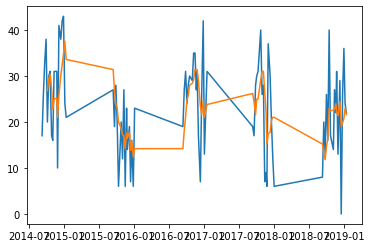

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dal.index, dal.team_score)
ax.plot(dal.index, dal.team_score.rolling(5).mean())

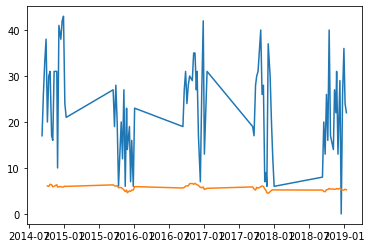

In [55]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(dal.index, dal.team_score)
ax1.plot(dal.index, dal.yards_per_play.rolling(5).mean())

In [50]:
dal.columns

Index(['drive', 'goal_to_go', 'air_yards', 'yards_after_catch', 'punt_blocked',
       'first_down_rush', 'first_down_pass', 'first_down_penalty',
       'interception', 'punt_inside_twenty', 'tackled_for_loss', 'qb_hit',
       'pass_attempt', 'sack', 'punt_attempt', 'fumble', 'return_yards',
       'team', 'home_team', 'away_team', 'team_score', 'opponent',
       'third_down_perc', 'fourth_down_perc', 'pass_perc',
       'yards_per_deep_pass', 'yards_per_rush', 'yards_per_short_pass',
       'yards_per_play', 'home', 'game_date'],
      dtype='object')